In [1]:
import scipy, scipy.integrate
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Se importa la data de las casas

In [2]:
data= pd.read_csv("house_data.csv")
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


# Realizo una matriz de correlacion
En esta podemos observar cual de la caracteristica de la casa tiene se relacionan más con el precio.

Algo que esta altamente correlacionado, la correlación es =1. 

Existen tres tipos de correlación:

1)Correlación positiva: cuando dos variables aumentan o disminuyen al mismo tiempo.

2)Correlación negativa: cuando una variable aumenta y la otra disminuye o viceversa.

3)Correlación zero: No se relacionan para nada


In [3]:
corr = data.corr()

corr.style.background_gradient(cmap='coolwarm')

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


Con base en los datos datos en la tabla de correlación, podemos decir que las caracteristicas que más influencia tienen el el precio de las casas son: 
* sqft_living
* Grade
* sqft_loft, 
* número de baños

# Realizo gráficos de dispersión 
Se hace un gráfico de dispersión para estas variables para ver como se relacionan con el precio de la casa

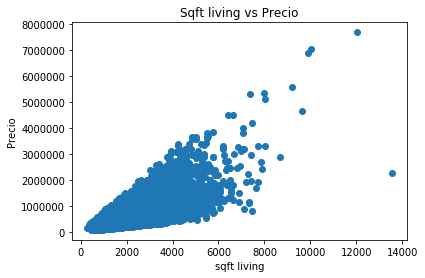

In [4]:
plt.scatter(data.sqft_living, data.price)
plt.xlabel("sqft living")
plt.ylabel("Precio")
plt.title('Sqft living vs Precio')
plt.savefig('scatter_sqftliving_vs_price.png')

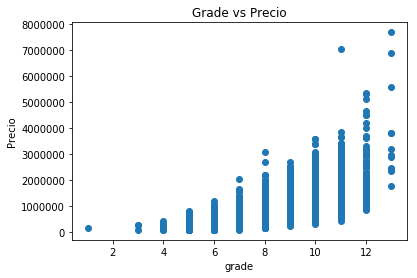

In [5]:
#Grafico de dispersion de precio con el grado
plt.scatter(data.grade, data.price)
plt.xlabel("grade")
plt.ylabel("Precio")
plt.title('Grade vs Precio')
plt.savefig('grade_vs_price.png')

Con base en estos dos gráficos podemos observar que a medida que el sqtf living va aumentando al precio aumenta y se puede decir que estos tienen una relación lineal. Mientras que a medida que el grado aumenta igualmente aumenta el precio 

# Modelo para predecir precio de casa

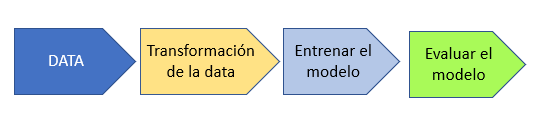

## Dividimos la data en X y Y
donde y son los precios de las casa

In [6]:
data=data.drop(['id','date'], axis=1)

X = data.drop('price',axis =1)
y = data['price']

##  Dividir la data para entrenamiento y pruebas
entren la que vamos a usar para entrenar y para hacer la prueba, voy a usar 80% de la data para entrenar y 20% para prueba 

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Normalización 


Debido a que hay variables con valores muy altos y otros que son muy bajos, se realiza una normalización a los datos. Escalando los valores a un rango especifico para que sea mas facil el entrenamiento.

In [8]:
std=StandardScaler()

Para (X_train)  se hace fit y transform, que lo que hace esto es entender la información y luego transformarla, pero para X_test solamente la transformo debido a que no queremos entender esta data, porque el modelo va a empezzar a aprender (estudiar) con la data de entrenamiento y luego se le proporciona la nueva data que es la prueba. 

X_train hacemos fit transform: this understand the data and then transform, but we dont want to understand the data of X_test because your modell will start learning (studying) with train data and then you will give new data which is test. studying for an exam the question is x_train and the answeer is y_train, so the new question will be test_x and our model will write y_prep (his answer) and then we will compare the answers with test_y. 

So we dont want to understand x_test only transforme it, to prevent data leaquing 

In [27]:

#X_train_scale= std.fit_transform(X_train)
#X_test_scale= std.transform(X_test)

min_max_scaler = preprocessing.MinMaxScaler()
X_train_scale = min_max_scaler.fit_transform(X_train)
X_test_scale = min_max_scaler.transform(X_test)

In [28]:
X_train_scale

array([[0.18181818, 0.21875   , 0.06415094, ..., 0.19518272, 0.14116119,
        0.00076734],
       [0.27272727, 0.28125   , 0.09735849, ..., 0.4269103 , 0.25431274,
        0.00405265],
       [0.27272727, 0.3125    , 0.1554717 , ..., 0.34136213, 0.35633463,
        0.01131825],
       ...,
       [0.27272727, 0.3125    , 0.1290566 , ..., 0.36378738, 0.33036542,
        0.02198748],
       [0.27272727, 0.3125    , 0.2       , ..., 0.31810631, 0.49916528,
        0.01112986],
       [0.27272727, 0.125     , 0.04981132, ..., 0.32059801, 0.20793916,
        0.01156063]])

Ahora nuestra data esta en un rango en particular por lo que nuestro modelo puede viajar lad distancias facilmente


# Entrenamiento del modelo

Se hace uno con regresion lineal 

In [29]:
#Defino la regresion lineal
lr=LinearRegression()

Se realiza el entrenamiento 

In [30]:
lr.fit(X_train_scale,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
#La respuesta del modelo a la pregunta
y_pred= lr.predict(X_test_scale)


In [32]:
y_test

11652    629000.0
12516    572000.0
15337    235000.0
17564    600000.0
2361     500000.0
           ...   
8913     370000.0
2979     299950.0
15845    255000.0
20682    922755.0
11055    399000.0
Name: price, Length: 4323, dtype: float64

## Evaluación del modelo

In [33]:
mean_absolute_error(y_test,y_pred)

129097.79994574733

In [34]:
#Efectividad del modelo
r2_score(y_test,y_pred)

0.6978735219183217

# Modelo de redes neuronal

Creo una red neuronal 
* 3 capas ocultas: la primera con 64 unidadespara construir la red neuronal, la segunda con 32 y la tercera con 16. 
* La red neuronal terminal con una unidad y activación linear. Por lo que la red es libre de aprender.

* "loss function" es Error cuadrático medio, que se refiere a el cuadrado de la diferencia entre la predicción y el target, esta función es la más usada para problemas de regresión. 

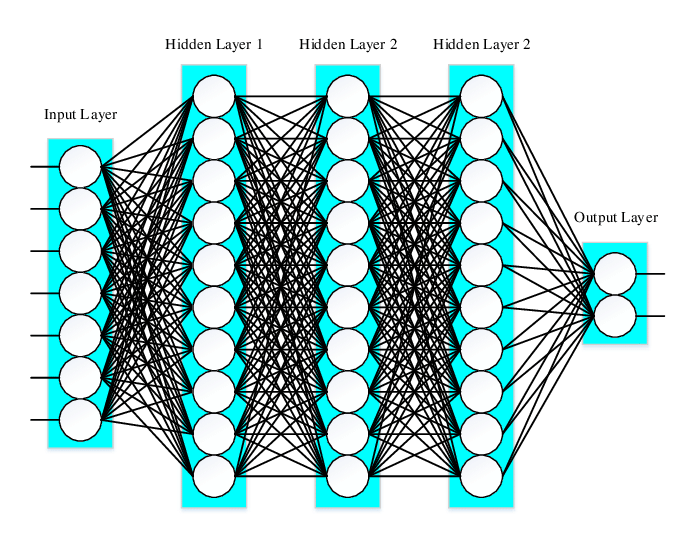

In [35]:
#Creo el modelo
model =Sequential()
model.add(Dense(64,input_dim=X_train.shape[1],activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='linear'))

In [36]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [37]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 64)                1216      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 17        
Total params: 3,841
Trainable params: 3,841
Non-trainable params: 0
_________________________________________________________________


In [38]:
#epochs es el numero de veces que entreno el modelo
epochs=20

batch_size=10

model.fit(X_train_scale,np.log(y_train),verbose=0,validation_data=(X_test_scale,np.log(y_test)),epochs=epochs,batch_size=batch_size)

In [39]:
#Respuesta del modelo (la predicha ) 
y_pred2=np.exp(model.predict(X_test_scale))

## Obtengo el error medio absoluto
Es el valor absoluto de la diferencia entre la predicción y el real.

In [40]:
mean_absolute_error(y_test,y_pred2)

80035.69963892263

In [41]:
#Efectidad del modelo
r2_score(y_test,y_pred2)

0.8472800914809377

## Visualización del resultado

C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2019: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:251: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


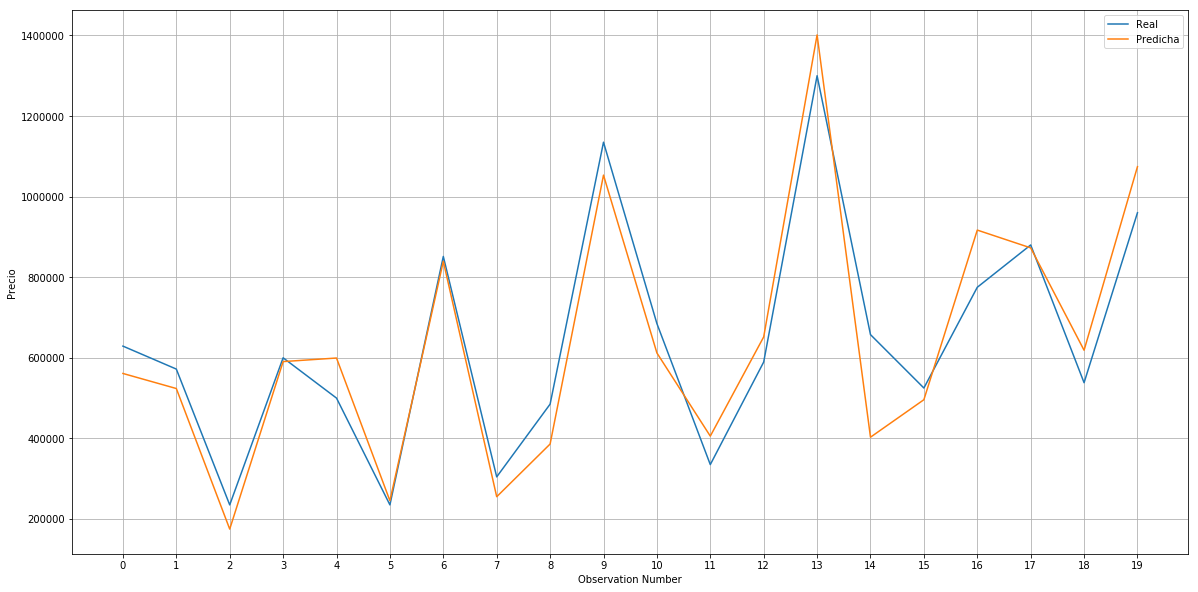

In [42]:
number_of_observations=20

x_ax = range(len(y_test[:number_of_observations]))

plt.figure(figsize=(20,10))

plt.plot(x_ax, y_test[:number_of_observations], label="Real")

plt.plot(x_ax, y_pred2[:number_of_observations], label="Predicha")

plt.xlabel('Observation Number')

plt.ylabel('Precio')

plt.xticks(np.arange(number_of_observations))

plt.legend()

plt.grid()

plt.show()
plt.savefig('Visualizacion_resultado.png')
